In [3]:
from thesis.config import *
from thesis.thesis_utils import load_p
from core.id_detection.feature_manager import FeatureManager
from utils.video_manager import get_auto_video_manager
import matplotlib.pyplot as plt
from utils.drawing.points import draw_points_crop
from utils.img import get_safe_selection
import cv2
from core.id_detection.features import get_idtracker_features
from core.region.clustering import draw_region
import matplotlib.gridspec as gridspec
from PyQt4 import QtGui
from utils.drawing.points import draw_points

offset = 50

In [11]:
p = load_p(cam1_path, semistate='id_classified')
fm = FeatureManager(p.working_directory, db_name='fm_idtracker_i')
vm = get_auto_video_manager(p)

ex_single = [p.chm[39][0], p.chm[1346][2]]
# ex_multi = [p.chm[1830][-1], p.chm[38][1]]
ex_multi = [p.chm[1880][-5], p.chm[882][3]]
ex_noise = [p.chm[2478][0], p.chm[1349][0]]
ex_parts = [p.chm[3561][0], p.chm[3560][0]]

examples = ex_single + ex_multi + ex_parts + ex_noise 
print examples

dataset = 'cam1'
offset = 50

Initializing db at /Users/flipajs/Documents/wd/FERDA/Cam1_playground/rm.sqlite3 


Initializing db at /Users/flipajs/Documents/wd/FERDA/Cam1_playground/temp/part0_rm.sqlite3 
Initializing db at /Users/flipajs/Documents/wd/FERDA/Cam1_playground/fm_idtracker_i 
[817, 4897, 19194, 23804, 23100, 23098, 4878, 4895]


['single-id', 'single-id', 'multi-id', 'multi-id', 'id-part', 'id-part', 'no-id', 'no-id']


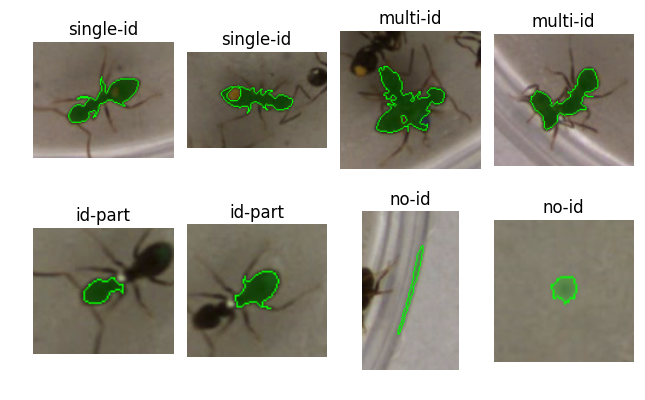

In [30]:
plt.figure()

gs = gridspec.GridSpec(2, len(examples)/2)

names = ['single-id']*2 + ['multi-id']*2 + ['id-part']*2 + ['no-id']*2
print names

for i, e in enumerate(examples):
    r = p.gm.region(e)
    img = cv2.cvtColor(vm.get_frame(r.frame()), cv2.COLOR_BGR2RGB)
    
    y, x = r.centroid() - offset
    im1 = vm.get_frame(r.frame()).copy()
    c1 = QtGui.QColor(0, 255, 0, 255)
    draw_points(im1, r.contour(), color=c1)
    c2 = QtGui.QColor(0, 255, 0, 50)
    draw_points(im1, r.pts(), color=c2)
    roi = r.roi().safe_expand(30, im1)
    im = im1[roi.slices()].copy()
    
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        
    plt.subplot(gs[i])
    plt.imshow(im)
    plt.title(names[i])
    plt.axis('off')
    
    
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.1, left=0.0, right=1.0)
plt.savefig(OUT_IMGS_WD+'/'+dataset+'_seg_ex.png', bbox_inches='tight', dpi=256)
plt.show()

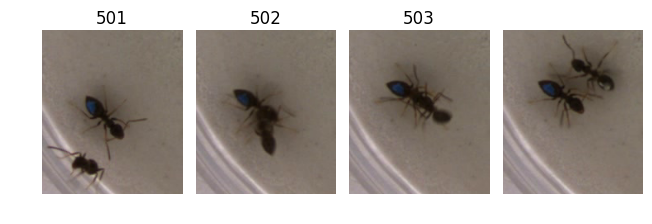

In [12]:
############## Cam1 jump sequence...
frames = range(500, 504)
ycrop = 620
yycrop = 820
xcrop = 150
xxcrop = 320

plt.figure()

for i, frame in enumerate(frames):
    im = vm.get_frame(frame)
    c = im[ycrop:yycrop, xcrop:xxcrop, :].copy()
    c = cv2.cvtColor(c, cv2.COLOR_BGR2RGB)
    plt.title(frame)
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(c)
    
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.1, left=0.0, right=1.0)
plt.savefig(OUT_IMGS_WD+'/dataset/'+dataset+'_jump_seq.png', bbox_inches='tight', dpi=256)
plt.show()

Initializing db at /Users/flipajs/Documents/wd/FERDA/Camera3/rm.sqlite3 


Initializing db at /Users/flipajs/Documents/wd/FERDA/Camera3/temp/part0_rm.sqlite3 
Initializing db at /Users/flipajs/Documents/wd/FERDA/Camera3/fm_idtracker_i 


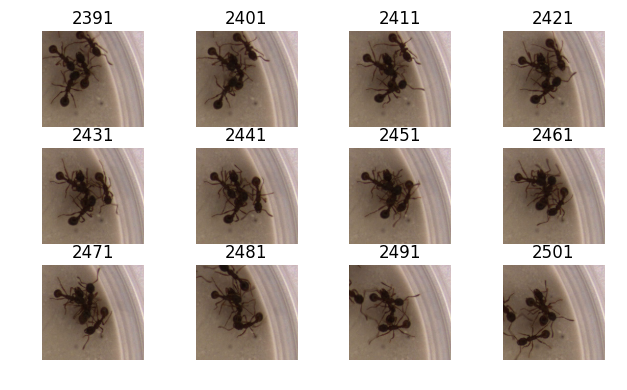

In [14]:
############## Cam3 jump sequence...
p = load_p(camera3_path, semistate='id_classified')
fm = FeatureManager(p.working_directory, db_name='fm_idtracker_i')
vm = get_auto_video_manager(p)

dataset='camera3'

frames = range(2391, 3000, 10)
frames = frames[:12]
ycrop = 280
yycrop = 470
xcrop = 750
xxcrop = 950

plt.figure()

for i, frame in enumerate(frames):
    im = vm.get_frame(frame)
    c = im[ycrop:yycrop, xcrop:xxcrop, :].copy()
    c = cv2.cvtColor(c, cv2.COLOR_BGR2RGB)
    plt.subplot(3, 4, i+1)
    plt.title(frame)
    plt.axis('off')
    plt.imshow(c)
    
plt.tight_layout()
plt.subplots_adjust(hspace=0.22, wspace=0.1, left=0.0, right=1.0)
plt.savefig(OUT_IMGS_WD+'/dataset/'+dataset+'_interaction_seq.png', bbox_inches='tight', dpi=256)
plt.show()